### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

Para ello vamos a utilizar un conjunto de datos provenientes de un estudio de granos pertenecientes a distintas variedades de trigo. Los atributos de los datos provienen de una visualización de alta calidad de la estructura interna del grano utilizando una técnica de rayos X suaves. La ventaja de esta técnica es que no es destructiva y es considerablemente más económica que otras técnicas de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se registraron en placas KODAK de rayos X de 13x18 cm. Los estudios se llevaron a cabo utilizando grano de trigo cosechado en combinación procedente de campos experimentales, explorados en el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.


Los atributos observados son seis parámetros geométricos medidos en los granos de trigo:

V1: área A

V2: perímetro P

V3: longitud de la semilla

V4: ancho de la semilla

V5: coeficiente de asimetría

V6: longitud de la ranura de la semilla

Se trata de analizar de que manera estos atributos permiten generar grupos en los datos que correspondan idealmente a cada variedad de trigo disponible en los datos.

package 'cluster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\the_f\AppData\Local\Temp\RtmpsbNXtN\downloaded_packages
      V1    V2    V3    V4    V5    V6
1  16.63 15.46 6.053 3.465 2.040 5.877
2  20.03 16.90 6.493 3.857 3.063 6.320
3  15.60 15.11 5.832 3.286 2.725 5.752
4  10.82 12.83 5.180 2.630 4.853 5.089
5  14.79 14.52 5.545 3.291 2.704 5.111
6  14.03 14.16 5.438 3.201 1.717 5.001
7  16.44 15.25 5.884 3.505 1.969 5.533
8  13.78 14.06 5.479 3.156 3.136 4.872
9  18.76 16.20 6.172 3.796 3.120 6.053
10 12.88 13.50 5.139 3.119 2.352 4.607


       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

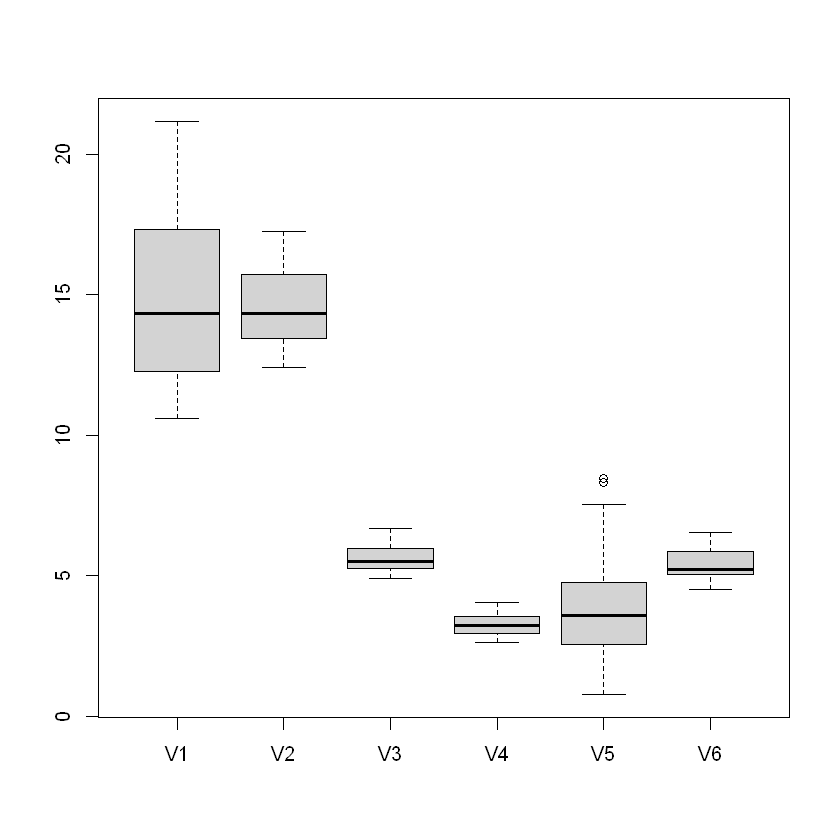

In [1]:
install.packages("cluster")
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("semillas1.txt",dec=".")

print(datos[1:10,])
summary(datos)
boxplot(datos)

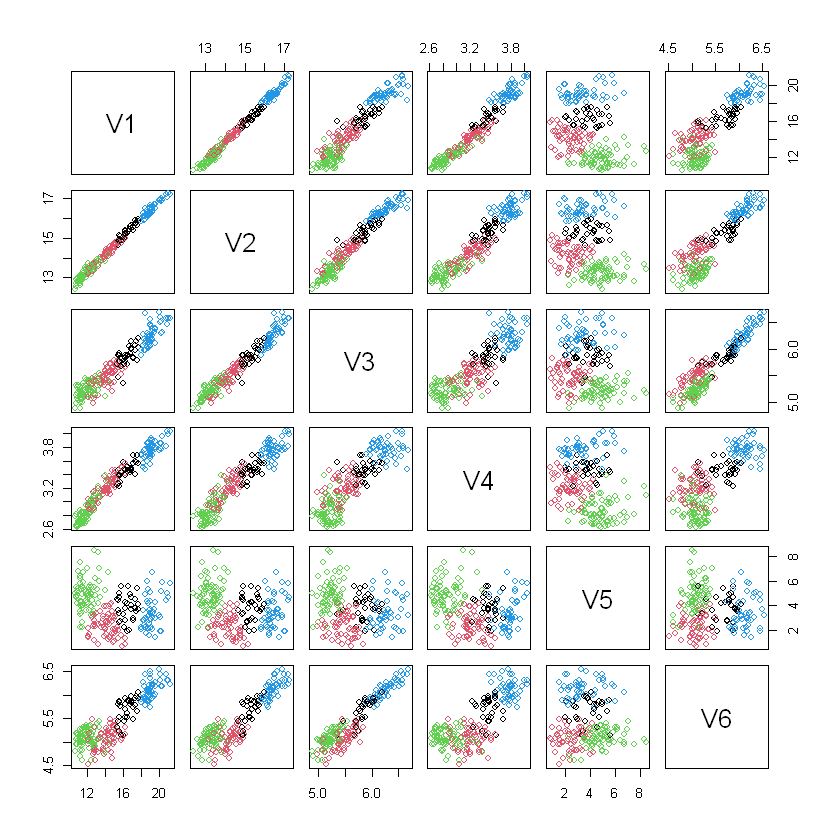

In [2]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

In [3]:
#Un buen grupo está bien separado y pintado

Al considerar 2,3 o 4 grupos con el algoritmo KMeans, se obtienen grupos bastante bien diferenciados por las variables area, perimetro longitud de las semillas. Las tres últimas variables tienen valores con mayor nivel de confusión entre los grupos definidos por kmeans.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1,1.2209796,-0.2371274,0.02424665,-0.03216181,0.006992513,-0.034944879
2,-0.6521064,1.0430904,0.16993814,0.09992983,-0.013396969,-0.006634148
3,-2.1449502,-0.6115826,-0.11654550,-0.03565510,0.002483217,0.007844728
4,3.2304234,-0.2116132,-0.04972335,-0.04857660,0.008226285,0.018955948


K-means clustering with 4 clusters of sizes 31, 59, 72, 48

Cluster means:
        V1       V2       V3       V4       V5       V6
1 16.40806 15.31935 5.863968 3.463323 3.850097 5.690452
2 14.10068 14.19559 5.475576 3.212542 2.370051 5.065847
3 11.91861 13.25681 5.225625 2.865319 4.885500 5.087472
4 19.15104 16.46917 6.268854 3.772938 3.460417 6.127250

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   4   1   3   2   2   1   2   4   2   3   2   1   1   4   3   3   1   1   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  3   4   2   3   3   1   3   2   2   4   2   2   3   2   1   4   4   3   2   3 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  3   3   4   2   3   4   4   3   3   3   4   3   1   3   2   2   1   2   4   3 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   4   3   1   4   2   4   1   1   3   4   2   1   4   

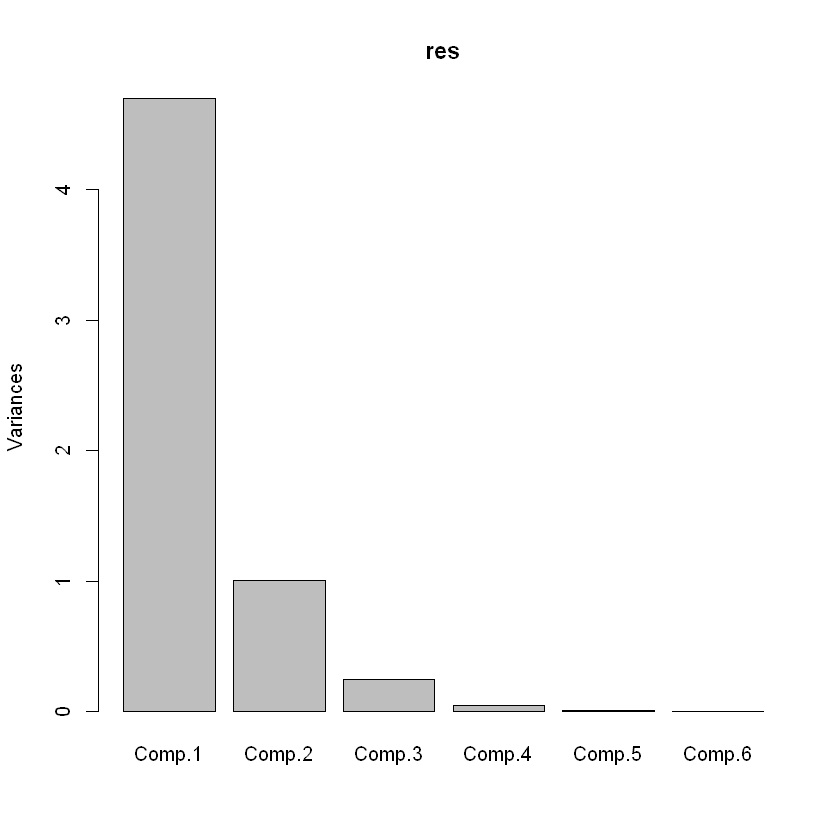

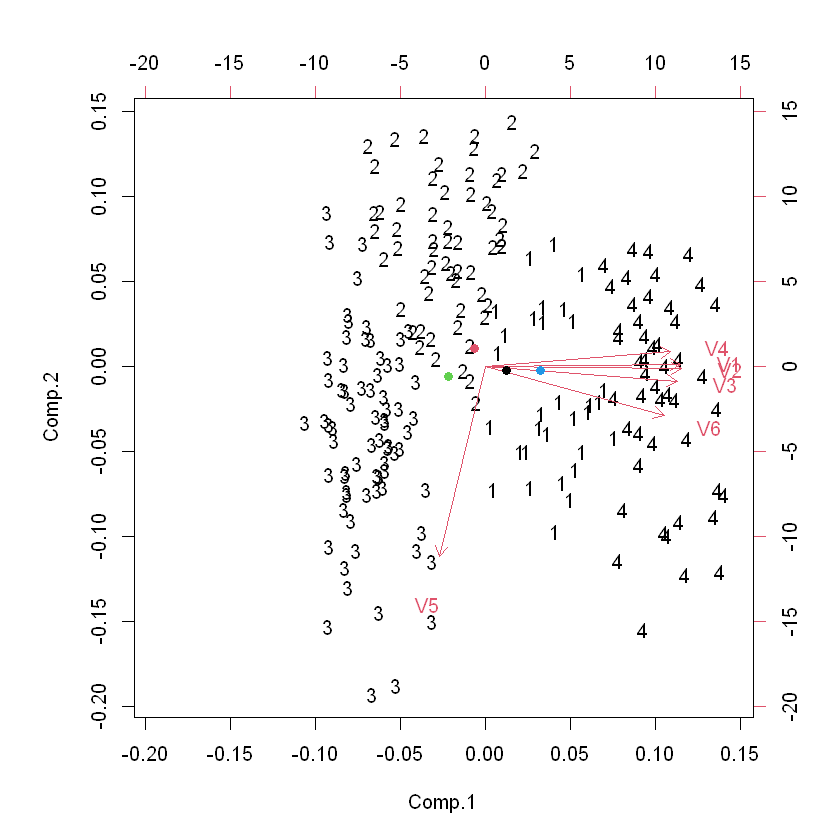

In [4]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)

res2 <- predict(res,cl$centers)
res2
cl
#Se utiliza como etiqueta cl$cluster
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 2 representa a las semillas con mayores valores de todas las variables excepto V5, el coeficiente de simetría. El grupo 1 representa las semillas con valores intermendios de las distintas variables  y los grupos 3 y 4 con los menores valores. Se distinguen el grupo 3 del 4 por sus mayores valores de V5 el coeficiente de simetría. 


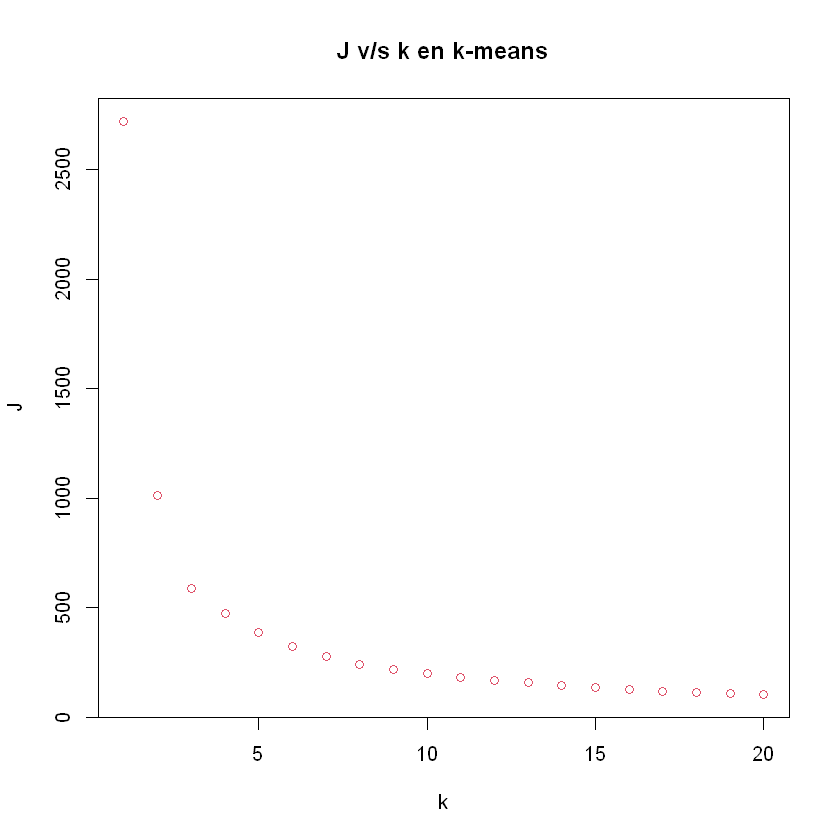

In [5]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado

J<-rep(0,20)
fin_iter<-20

#Algoritmo del codo Heuristica 1
for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

### Ejercicio 1:

1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Explique su decisión.


In [6]:
#El valor más apropiado para K es 3, ya que es el último lugar El número de iteración donde al aumentar el número de grupos disminuye drásticamente la función de perdida

2. Realice nuevamente los cálculos con el K óptimo y  aracterice los grupos obtenidos. Interprete sus resultados

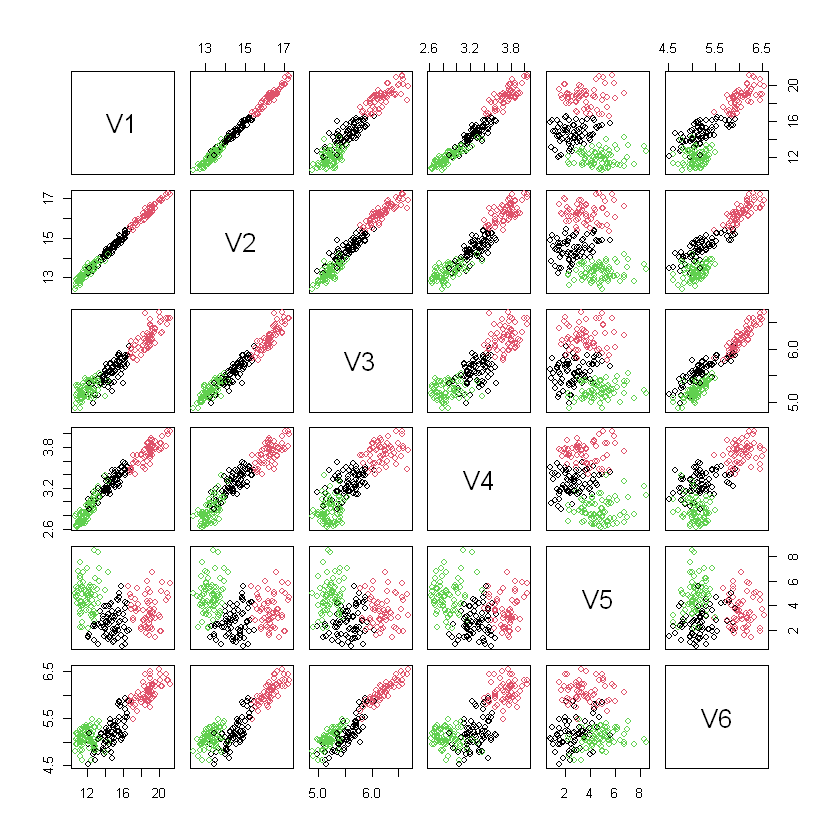

In [7]:
#ingresar valor de k
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

#Comparando los resultados obtenidos con k=4 y K=3 se puede observar que los datos se distinguen mejor en tres grupos que cuatro

## Otras alternativas de cálculo

package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\the_f\AppData\Local\Temp\RtmpsbNXtN\downloaded_packages


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



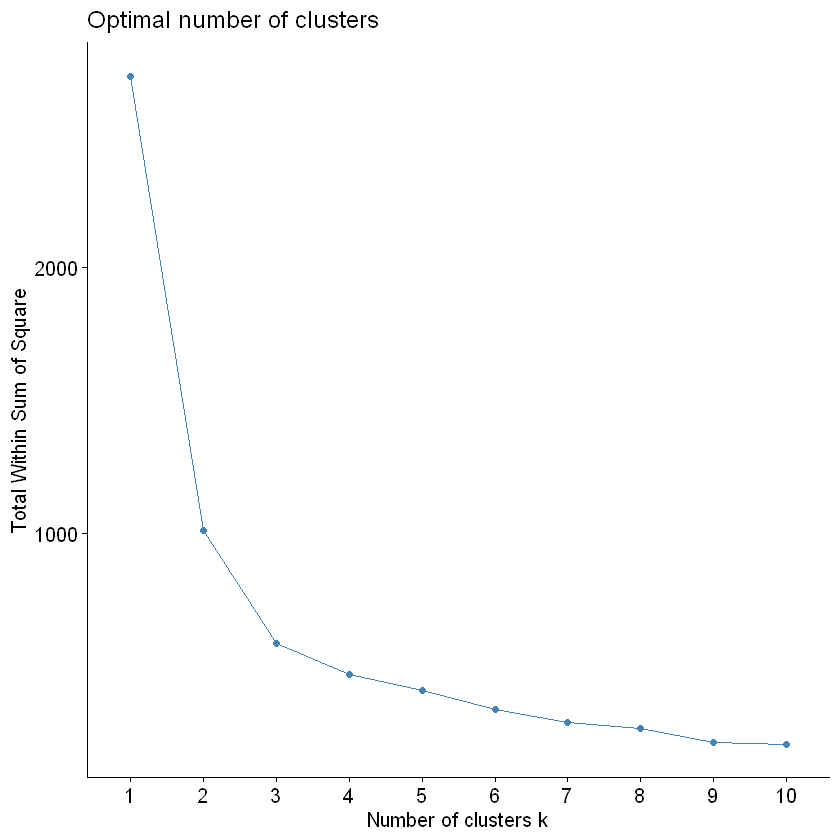

In [8]:
#Heuristica 2 , dependencies = TRUE
install.packages("factoextra")
library(cluster)
library(factoextra)
df <- data.frame(datos)
fviz_nbclust(df, kmeans, method = "wss")

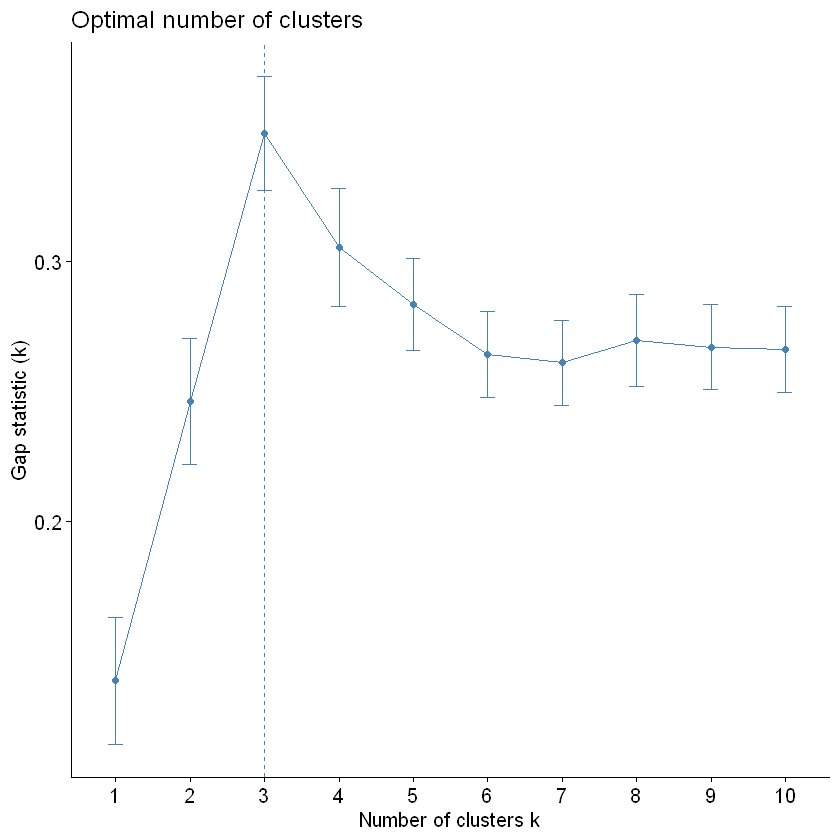

In [9]:
#Heuristica 3 gat estadistico
#calculo de gap estadístico basado en el número de grupos: 
#tasa entre la suma de distancias intragrupos con k grupos y con un sólo un grupo
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)

fviz_gap_stat(gap_stat)

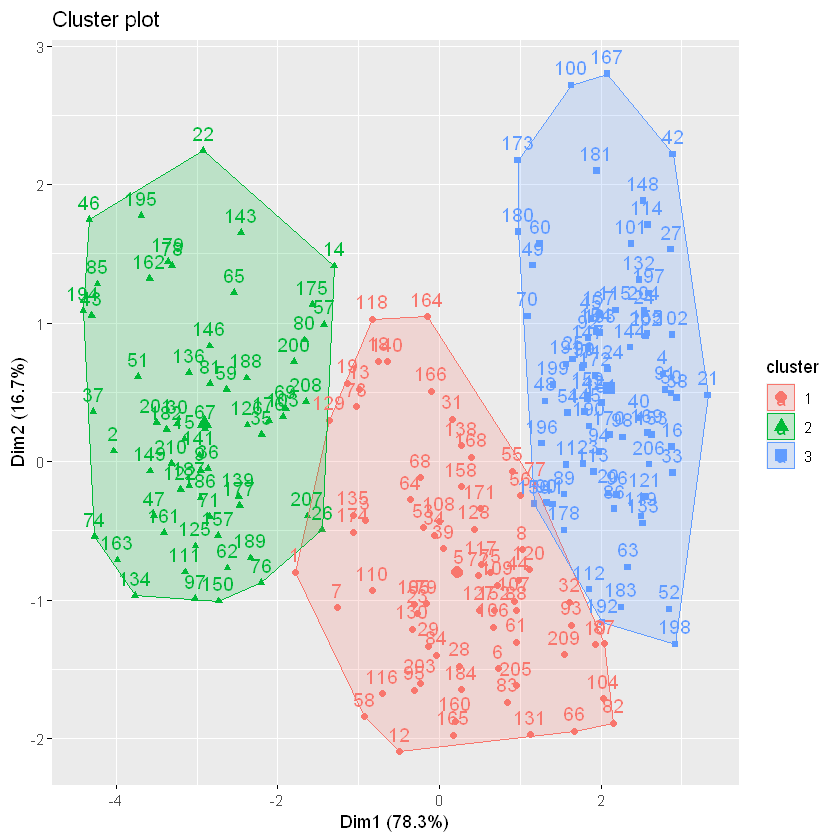

In [10]:
fviz_cluster(cl, df)

### Ejercicio 2:
Realice un análisis de clustering con un subconjunto de datos de datosComunas.csv (puede escoger variables (al menos 5) y comunas (al menos 30) indicando el criterio utilizado en su elección.

In [171]:
# Carga los datos
datosC <- read.csv("datosComunas.csv", header=TRUE, sep=";", dec=",")
datosF <- datosC[1:30,2:24]
seleccionar_columnas <- c(2,4,11,15,18,20,21)
#datosFinales <- as.data.frame(s)
df_seleccionado <- datosF[, seleccionar_columnas]
df_seleccionado

,A2,A4,A11,C1,C4,C6,S1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.72,0.84,1.39,1.57,0.02,0.11,663.6962
2,2.87,1.14,1.26,1.22,0.00,0.00,419.6681
3,2.47,1.03,1.24,1.08,0.03,0.19,809.5926
4,3.98,1.18,1.19,0.74,0.00,0.10,722.1279
5,3.92,2.19,1.29,0.94,0.30,0.29,650.6670
6,7.72,6.49,0.85,0.79,7.14,0.55,102.6549
7,4.86,2.86,1.35,1.53,0.16,0.23,419.0695
8,5.65,8.29,1.44,1.00,0.07,0.80,636.3498
9,5.08,1.41,1.15,1.11,0.06,0.31,620.7940


1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

In [172]:

# A1 - A9 varibles a analizar
# Estas variables pertenecen a 1. Acceso a servicios y equipamientos públicos básicos
# y A1 - A7 corresponde a Accesibilidad a áreas verdes.

# Luego tenemos que A8 y A9 corresponden a Accesibilidad a salud primaria pública

# A1 = Distancia a plazas públicas
# A2 = Superficie de plazas públicas por habitante que cumple estándar de distancia (400 metros)
# A3 = Distancia a parques públicos
# A4 = Superficie de parques públicos por habitante que cumple estándar de distancia (3000 metros)
# A5 = Porcentaje de población atendida por el sistema de plazas públicas 
# A6 = Porcentaje de población atendida por el sistema de parques públicos
# A7 = Superficie de áreas verdes públicas por habitante 

# A8 = Distancia a centros de salud primaria
# A9 = Cantidad de jornadas diarias de médicos / 10.000 habitantes

#   Por un lado podemos obtener datos beneficiosos de como esta distribuida la cantidad de espacios publicos segun la comuna que se evalua
#   y ademas tenemos datos de los centros de salud tal como la distancia y medicos por cada 10.000 habitantes, lo que igual nos permitiria evaluar
#   la situacion de salud de las comunas.



In [173]:
#m <- ifelse(is.na(df_seleccionado), 0, df_seleccionado)
#mi_lista <- lapply(m, function(m) ifelse(is.infinite(m), 0, m))

2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 

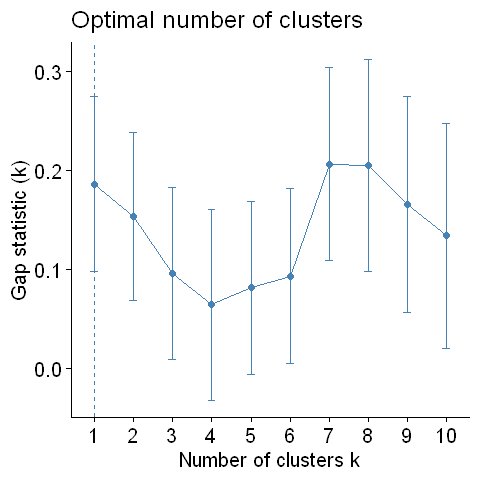

In [174]:
#Utiliza la heurística 3 para conocer el K óptimo
#calculo de gap estadístico
df <- data.frame(df_seleccionado)
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)

fviz_gap_stat(gap_stat)

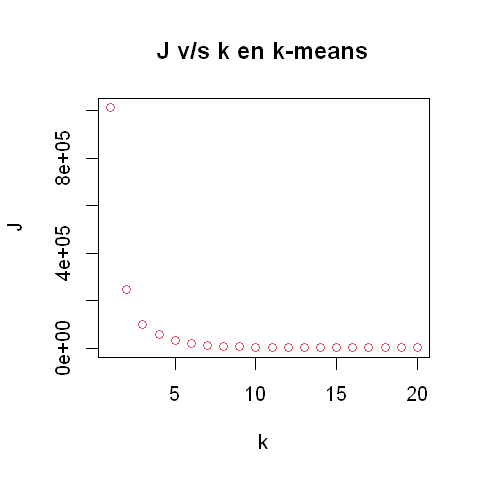

In [175]:
J<-rep(0,20)
fin_iter<-20

#Algoritmo del codo Heuristica 1
for (k in 1:fin_iter){
     cl<-kmeans(df,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

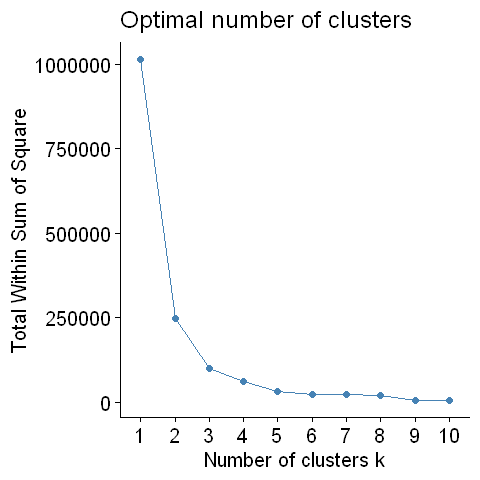

In [176]:
fviz_nbclust(df, kmeans, method = "wss")

3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados

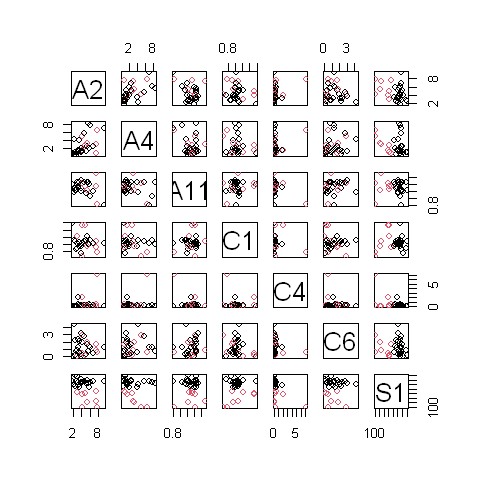

In [177]:

k0 = 2

cl <- kmeans(df, k0, iter.max=1000, nstart=10)


pairs(df, col=cl$cluster)